# Prediksi Predikat Lulus

## Drive - Colab

In [ ]:
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ai_contest/Kelulusan/olah

/content/drive/MyDrive/ai_contest/Kelulusan/olah


## Import Modules 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## S1 

In [ ]:
df = pd.read_csv('new_lulus_sarjana.csv')

In [ ]:
df.head()

,IP1,IP2,IP3,IP4,IP5,IP6,IP7,IP8,Average,Predikat
0,3.16,3.42,3.00,3.48,3.97,3.66,2.52,3.84,3.38,Sangat Memuaskan
1,3.60,3.54,3.79,3.82,3.80,3.86,3.52,3.58,3.69,Cumlaude
2,3.65,3.65,3.75,3.86,3.82,3.80,3.60,3.74,3.73,Cumlaude
3,3.70,3.82,3.85,3.67,3.88,3.85,3.66,3.84,3.78,Cumlaude
4,3.98,3.62,3.77,3.70,3.93,3.79,3.77,3.55,3.77,Cumlaude


In [ ]:
df.Predikat.value_counts()

Memuaskan           3773
Sangat Memuaskan    3539
Cumlaude            2029
Tidak Lulus          659
Name: Predikat, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IP1       10000 non-null  float64
 1   IP2       10000 non-null  float64
 2   IP3       10000 non-null  float64
 3   IP4       10000 non-null  float64
 4   IP5       10000 non-null  float64
 5   IP6       10000 non-null  float64
 6   IP7       10000 non-null  float64
 7   IP8       10000 non-null  float64
 8   Average   10000 non-null  float64
 9   Predikat  10000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 781.4+ KB


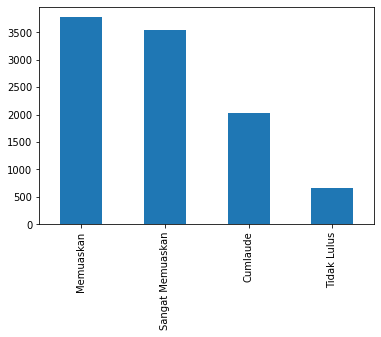

In [ ]:
df['Predikat'].value_counts().plot(kind='bar')

## Sarjana

In [ ]:
df_new = df.drop(['IP7', 'IP8'], axis=1)

In [ ]:
# Backup
df_new.to_csv('nilai_sarjana_predict.csv', index=False)

## Label Encoding

In [ ]:
df = pd.read_csv('nilai_sarjana_predict.csv', index_col=None)

In [ ]:
df.head()

,IP1,IP2,IP3,IP4,IP5,IP6,Average,Predikat
0,3.16,3.42,3.00,3.48,3.97,3.66,3.38,Sangat Memuaskan
1,3.60,3.54,3.79,3.82,3.80,3.86,3.69,Cumlaude
2,3.65,3.65,3.75,3.86,3.82,3.80,3.73,Cumlaude
3,3.70,3.82,3.85,3.67,3.88,3.85,3.78,Cumlaude
4,3.98,3.62,3.77,3.70,3.93,3.79,3.77,Cumlaude


In [ ]:
df.Predikat.unique()

array(['Sangat Memuaskan', 'Cumlaude', 'Memuaskan', 'Tidak Lulus'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Predikat'] = le.fit_transform(df['Predikat'])
df.head()

,IP1,IP2,IP3,IP4,IP5,IP6,Average,Predikat
0,3.16,3.42,3.00,3.48,3.97,3.66,3.38,2
1,3.60,3.54,3.79,3.82,3.80,3.86,3.69,0
2,3.65,3.65,3.75,3.86,3.82,3.80,3.73,0
3,3.70,3.82,3.85,3.67,3.88,3.85,3.78,0
4,3.98,3.62,3.77,3.70,3.93,3.79,3.77,0


In [ ]:
df.Predikat.unique()

array([2, 0, 1, 3])

Keterangan:
* Cumlaude: 0
* Memuaskan: 1
* Sangat Memuaskan: 2
* Tidak Lulus: 3

In [ ]:
df.Predikat.value_counts()

1    3773
2    3539
0    2029
3     659
Name: Predikat, dtype: int64

## Predict

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Average', 'Predikat'], axis=1)
y = df['Predikat']

In [ ]:
X

,IP1,IP2,IP3,IP4,IP5,IP6
0,3.16,3.42,3.00,3.48,3.97,3.66
1,3.60,3.54,3.79,3.82,3.80,3.86
2,3.65,3.65,3.75,3.86,3.82,3.80
3,3.70,3.82,3.85,3.67,3.88,3.85
4,3.98,3.62,3.77,3.70,3.93,3.79
...,...,...,...,...,...,...
9995,2.93,2.84,2.13,0.73,3.19,1.19
9996,2.93,3.70,1.23,1.81,2.73,2.20
9997,3.72,3.37,1.57,3.70,0.03,2.00
9998,0.49,0.20,3.30,1.33,2.66,2.52


In [ ]:
y

0       2
1       0
2       0
3       0
4       0
       ..
9995    3
9996    1
9997    1
9998    3
9999    3
Name: Predikat, Length: 10000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 2, 0, ..., 1, 2, 2])

### Evaluate

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.876

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def test_acc(model):
  print(f"{model} score")
  print('\n')
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print('\n')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print("Accuracy Score:")
  print(accuracy_score(y_test, y_pred))

In [ ]:
test_acc(clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) score


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.82      0.87      0.84       740
           2       0.88      0.88      0.88       725
           3       0.81      0.58      0.68       131

    accuracy                           0.88      2000
   macro avg       0.88      0.83      0.85      2000
weighted avg       0.88      0.88      0.8

### Find best tree

In [ ]:
np.random.seed(42)
for i in range(10, 100, 10):
  print(f"Test model dengan {i} estimators...")
  model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
  print(f"Model accuracy: {model.score(X_test, y_test) *100}%")
  print("")

Test model dengan 10 estimators...
Model accuracy: 85.39999999999999%

Test model dengan 20 estimators...
Model accuracy: 86.65%

Test model dengan 30 estimators...
Model accuracy: 87.05000000000001%

Test model dengan 40 estimators...
Model accuracy: 87.1%

Test model dengan 50 estimators...
Model accuracy: 87.25%

Test model dengan 60 estimators...
Model accuracy: 87.35000000000001%

Test model dengan 70 estimators...
Model accuracy: 87.4%

Test model dengan 80 estimators...
Model accuracy: 87.75%

Test model dengan 90 estimators...
Model accuracy: 87.6%



In [ ]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup grid
grid = GridSearchCV(RandomForestClassifier(),
                    params,
                    cv=5)

# Fit grid search to data
grid.fit(X, y)

# Find best params
grid.best_params_

{'n_estimators': 80}

### Final Model

In [ ]:
clf = RandomForestClassifier(n_estimators=80, random_state=42)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)

0.8725

### Export model

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open("model_random_forest_sarjana.pkl", "wb"))

### Testing

In [ ]:
del clf

In [ ]:
rf_model = pickle.load(open('model_random_forest_sarjana.pkl', 'rb'))

In [ ]:
y_example = rf_model.predict([[3.9, 3.6, 3.7, 3.6, 3.5, 3.8]])
y_example

array([0])

In [ ]:
y_example1 = rf_model.predict([[3.0, 3.25, 3.10, 3.2, 2.9, 3.2]])
y_example1

array([2])

In [ ]:
y_example2 = rf_model.predict([[2.0, 2.25, 2.10, 2.2, 2.9, 2.35]])
y_example2

array([1])

In [ ]:
y_example3 = rf_model.predict([[1.0, 1.25, 1.10, 1.2, 1.9, 1.35]])
y_example3

array([3])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

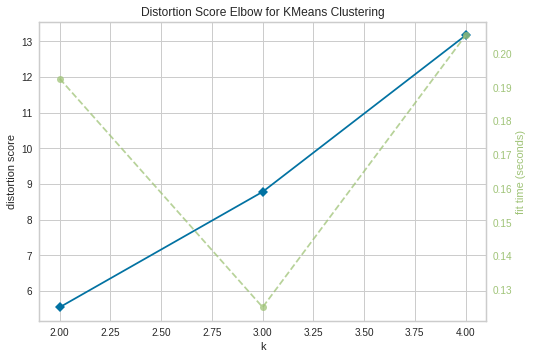

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,5))
visualizer.fit(df)
visualizer.poof()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.854

In [ ]:
test_acc(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform') score


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       404
           1       0.77      0.88      0.82       740
           2       0.88      0.83      0.85       725
           3       0.88      0.40      0.55       131

    accuracy                           0.85      2000
   macro avg       0.88      0.78      0.80      2000
weighted avg       0.86      0.85      0.85      2000



Confusion Matrix:
[[400   0   4   0]
 [  0 654  79   7]
 [  6 118 601   0]
 [  0  78   0  53]]


Accuracy Score:
0.854


In [ ]:
y_pred = knn.predict([[2.0, 2.25, 2.10, 2.2, 2.9, 2.35]])
y_pred

array([1])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.821

In [ ]:
y_example4 = dt.predict([[3.9, 3.6, 3.7, 3.6, 3.5, 3.8]])
y_example4

array([0])

In [ ]:
y_example5 = dt.predict([[3.0, 3.25, 3.10, 3.2, 2.9, 3.2]])
y_example5

array([2])

In [ ]:
y_example6 = dt.predict([[1.0, 1.25, 1.10, 1.2, 1.9, 1.35]])
y_example6

array([3])

In [ ]:
y_example7 = dt.predict([[2.0, 2.25, 2.10, 2.2, 2.9, 2.35]])
y_example7

array([1])

In [ ]:
test_acc(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') score


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       404
           1       0.77      0.75      0.76       740
           2       0.81      0.83      0.82       725
           3       0.63      0.69      0.66       131

    accuracy                           0.82      2000
   macro avg       0.80      0.81      0.81      2000
weighted avg       0.82      0.82      0.82      2000



Confusion Matrix:
[[398   1   5   0]
 [  0 555 134  51]
 [  2 123 599   1]
 [  0  40   1  90]]


Accuracy

## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
test_acc(svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) score


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       404
           1       0.83      0.87      0.85       740
           2       0.88      0.88      0.88       725
           3       0.84      0.66      0.74       131

    accuracy                           0.88      2000
   macro avg       0.89      0.85      0.87      2000
weighted avg       0.88      0.88      0.88      2000



Confusion Matrix:
[[399   0   5   0]
 [  0 646  78  16]
 [  3  86 636   0]
 [  0  45   0  86]]


Accuracy Score:
0.8835


## Comparison

In [ ]:
dt_value = accuracy_score(dt_pred, y_test)
knn_value = accuracy_score(knn_pred, y_test)
svm_value = accuracy_score(svm_pred, y_test)
rf_value = accuracy_score(rf_pred, y_test)

In [ ]:
compare = [dt_value, knn_value, svm_value, rf_value]
index = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
data_tuples = list(zip(index, compare))

In [ ]:
data_tuples

[('Decision Tree', 0.821),
 ('KNN', 0.854),
 ('SVM', 0.8835),
 ('Random Forest', 0.8755)]

In [ ]:
df_compare = pd.DataFrame(data_tuples, columns=['Algorithm', 'Score'])

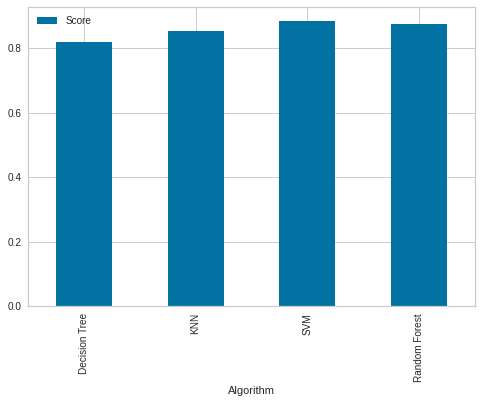

In [ ]:
df_compare.plot(kind='bar', x='Algorithm')

In [ ]:
y_example3 = svm.predict([[1.0, 1.25, 1.10, 1.2, 1.9, 1.35]])
print(y_example3)
y_example2 = svm.predict([[2.0, 2.25, 2.10, 2.2, 2.9, 2.35]])
print(y_example2)
y_example1 = svm.predict([[3.0, 3.25, 3.10, 3.2, 2.9, 3.2]])
print(y_example1)
y_example = svm.predict([[3.9, 3.6, 3.7, 3.6, 3.5, 3.8]])
print(y_example)

[3]
[1]
[2]
[0]


In [ ]:
# # All Model Save
# pickle.dump(svm, open("model_svm_sarjana.pkl", "wb"))
# pickle.dump(dt, open("model_dt_sarjana.pkl", "wb"))
# pickle.dump(knn, open("model_knn_sarjana.pkl", "wb"))
# pickle.dump(clf, open("model_random_forest_sarjana.pkl", "wb"))

## Diploma

In [ ]:
df = pd.read_csv('new_lulus_diploma.csv')

In [ ]:
df.head()

,IP1,IP2,IP3,IP4,IP5,IP6,Average,Predikat
0,3.36,2.11,3.09,3.34,2.59,2.56,2.84,Sangat Memuaskan
1,3.61,3.66,3.61,3.90,3.84,3.89,3.75,Cumlaude
2,3.63,3.95,3.76,3.84,3.76,3.78,3.79,Cumlaude
3,3.51,3.62,3.98,3.77,3.65,3.61,3.69,Cumlaude
4,3.98,3.83,3.64,3.96,3.94,3.89,3.87,Cumlaude


In [ ]:
df.Predikat.value_counts()

Sangat Memuaskan    3974
Memuaskan           3609
Cumlaude            1666
Tidak Lulus          751
Name: Predikat, dtype: int64

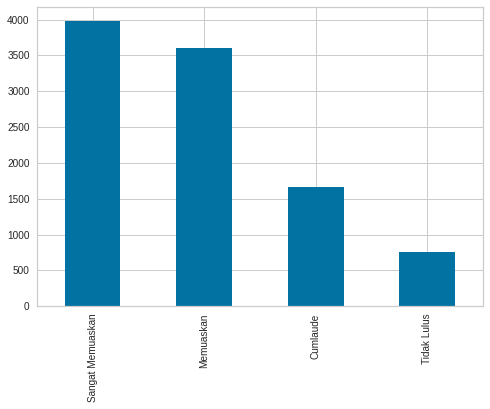

In [ ]:
df['Predikat'].value_counts().plot(kind='bar')

In [ ]:
df_new = df.drop(['IP5', 'IP6'], axis=1)

In [ ]:
# df_new.to_csv('nilai_diploma_predict.csv', index=False)

In [ ]:
df = pd.read_csv('nilai_diploma_predict.csv', index_col=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Predikat'] = le.fit_transform(df['Predikat'])
df.head()

,IP1,IP2,IP3,IP4,Average,Predikat
0,3.36,2.11,3.09,3.34,2.84,2
1,3.61,3.66,3.61,3.90,3.75,0
2,3.63,3.95,3.76,3.84,3.79,0
3,3.51,3.62,3.98,3.77,3.69,0
4,3.98,3.83,3.64,3.96,3.87,0


Keterangan:
* Cumlaude: 0
* Memuaskan: 1
* Sangat Memuaskan: 2
* Tidak Lulus: 3

In [ ]:
X = df.drop(['Average', 'Predikat'], axis=1)
y = df['Predikat']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80, random_state=42)
clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)

In [ ]:
accuracy_score(rf_pred, y_test)

0.8295

In [ ]:
y_example3 = clf.predict([[1.0, 1.25, 1.10, 1.2]])
print(y_example3)
y_example2 = clf.predict([[2.0, 2.25, 2.10, 2.2]])
print(y_example2)
y_example1 = clf.predict([[3.0, 3.25, 3.10, 3.2]])
print(y_example1)
y_example = clf.predict([[3.9, 3.6, 3.7, 3.6]])
print(y_example)

[3]
[1]
[2]
[0]


## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
y_example3 = dt.predict([[1.0, 1.25, 1.10, 1.2]])
print(y_example3)
y_example2 = dt.predict([[2.0, 2.25, 2.10, 2.2]])
print(y_example2)
y_example1 = dt.predict([[3.0, 3.25, 3.10, 3.2]])
print(y_example1)
y_example = dt.predict([[3.9, 3.6, 3.7, 3.6]])
print(y_example)

[3]
[3]
[2]
[0]


In [ ]:
accuracy_score(dt_pred, y_test)

0.7655

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
accuracy_score(knn_pred, y_test)

0.798

In [ ]:
y_example3 = knn.predict([[1.0, 1.25, 1.10, 1.2]])
print(y_example3)
y_example2 = knn.predict([[2.0, 2.25, 2.10, 2.2]])
print(y_example2)
y_example1 = knn.predict([[3.0, 3.25, 3.10, 3.2]])
print(y_example1)
y_example = knn.predict([[3.9, 3.6, 3.7, 3.6]])
print(y_example)

[3]
[1]
[2]
[0]


## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
accuracy_score(svm_pred, y_test)

0.8305

In [ ]:
# Jadi array 2 dimensi ndarayy-2
y_example3 = svm.predict([[1.0, 1.25, 1.10, 1.2]])
print(y_example3)
y_example2 = svm.predict([[2.0, 2.25, 2.10, 2.2]])
print(y_example2)
y_example1 = svm.predict([[3.0, 3.25, 3.10, 3.2]])
print(y_example1)
y_example = svm.predict([[3.9, 3.6, 3.7, 3.6]])
print(y_example)

[3]
[1]
[2]
[0]


## Compare 2

In [ ]:
dt_value = accuracy_score(dt_pred, y_test)
knn_value = accuracy_score(knn_pred, y_test)
svm_value = accuracy_score(svm_pred, y_test)
rf_value = accuracy_score(rf_pred, y_test)

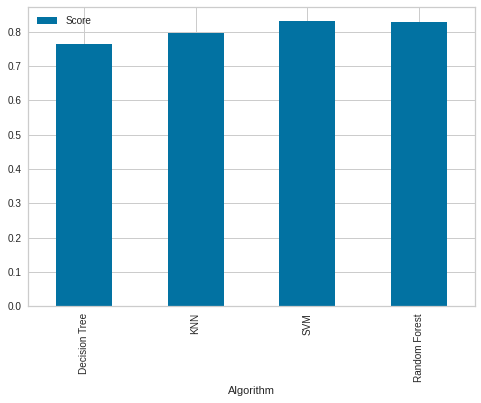

In [ ]:
compare = [dt_value, knn_value, svm_value, rf_value]
index = ['Decision Tree', 'KNN', 'SVM', 'Random Forest']
data_tuples = list(zip(index, compare))

df_compare2 = pd.DataFrame(data_tuples, columns=['Algorithm', 'Score'])
df_compare2.plot(kind='bar', x='Algorithm')

In [ ]:
# # All Model Save
# pickle.dump(svm, open("model_svm_diploma.pkl", "wb"))
# pickle.dump(dt, open("model_dt_diploma.pkl", "wb"))
# pickle.dump(knn, open("model_knn_diploma.pkl", "wb"))
# pickle.dump(clf, open("model_random_forest_diploma.pkl", "wb"))

## Kesimpulan

Pada notebook ini, kami mendapati bahwa SVM jauh lebih baik dalam melakukan prediksi nilai kelulusan, untuk itu pada notebook selanjutnya akan dilakukan prediksi menggunakan SVM